# ACP
## Réduction de dimension

**principe**
Réduire la complexité superflue d'un dataset en projetant ses données dans une espace de plus petite dimension (avec moins de variables)

**but**
Accélérer l'apprentissage
lutter conttre le fléau de la dimension (risque d'overfitting lilé au surplus de diemensions)

Projette les données sur des axes appelés **composantes principales** en cherchant à minimiser la distance entre les points et leur projection
<p>
<img src="../img/machine_learning/acp/projection.png" width="200"/>
<img src="../img/machine_learning/acp/projection_1.png"width="200"/>
<img src="../img/machine_learning/acp/projection_2.png" width="200"/>
</p>

Réduit la dimension du dataset en **préservant la variance des données** pour obtenir la projection la plus fidèle possible de données


Axes de projection $(X_pc)$ :
1. calcul la matrice de covariance des données
2. détermine les **vecteurs propres** de cette matrice (**composantes principales**)
3. projette les données sur ces axes

<img src="../img/machine_learning/acp/axes_projection.png" width="200"/>

In [ ]:
#  Charger le transformer PCA
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

iris = load_digits()
# X contient 64 variables
X = iris.data
# y = étiquettes du dataset digits, à savoir : 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
y = iris.target

# definier le nombre de dimension sur lesquelles projetter les données
model = PCA(n_components=2)
#  transformer les données
model.fit_transform(X)


array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])


<img src="../img/machine_learning/acp/digits.png" width="400"/>

### Combien de dimensions faut-il choisir ?

- Pour représenter graphiquement les données, alors 2 ou  3 dimensions maximum
- Pour conserver 95 à 99 % de la variance des données :

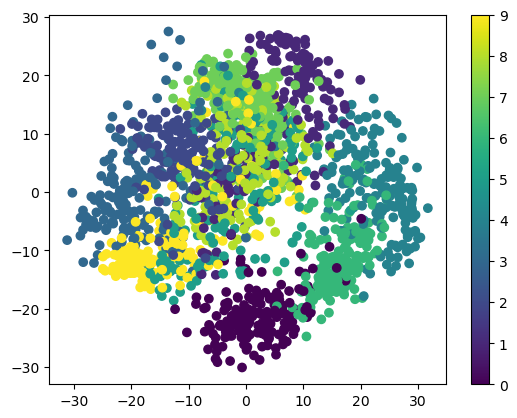

In [ ]:
import matplotlib.pyplot as plt
#  On limite à 2 dimensions/variables
model = PCA(n_components = 2)
X_reduced = model.fit_transform(X)
#  affiche la variable 1 (de toutes les obserations) en x et de la variable 2 en y
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y)
# ajoute la barre de couleur
plt.colorbar()

- Les 0 (en violet) sont tout en bas
- les 1 (en bleu foncé )tout en haut (visuellement très éloignés des 0)
- les 9 en bas sur la gauche
- les 7 (en vert) près des 1 (visuellement proche des 1)
- ...

Analyse le contenu de chaque composante (1 et 2) avec 64 valeurs chacunes

Correspond aux 64 variables du dataset

In [ ]:
model.components_

array([[ 0.00000000e+00, -1.73094651e-02, -2.23428835e-01,
        -1.35913304e-01, -3.30323092e-02, -9.66340844e-02,
        -8.32943805e-03,  2.26900082e-03, -3.20516495e-04,
        -1.19308905e-01, -2.44451676e-01,  1.48512745e-01,
        -4.67319410e-02, -2.17740744e-01, -1.48136776e-02,
         4.47779518e-03, -4.94136398e-05, -7.95419375e-02,
         8.33951454e-02,  2.15915342e-01, -1.72126801e-01,
        -1.63712098e-01,  2.86444452e-02,  4.23251803e-03,
         9.85488574e-05,  6.42319144e-02,  2.54093316e-01,
        -3.56771026e-02, -2.09462569e-01, -4.31311420e-02,
         5.13118688e-02,  2.13422732e-04,  0.00000000e+00,
         1.59950883e-01,  3.68690774e-01,  1.64406827e-01,
         8.52007908e-02,  3.72982855e-02,  2.15866980e-02,
         0.00000000e+00,  1.28865585e-03,  1.06945287e-01,
         3.03067457e-01,  2.47813041e-01,  2.09637296e-01,
         1.22325219e-02, -3.69458497e-02,  1.61485028e-03,
         6.93023548e-04, -8.35144239e-03, -5.58598986e-0

## Compresser un dataset pour accelerer l'apprentissage de la machine
En préservant entre 95 et 99 % de la variance

In [12]:
#  Entraine le model avec toutes ses variables/dimensions
model = PCA(n_components = 64)
X_reduced = model.fit_transform(X)

# Indique le % de variance préservé par chaque composante
model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [13]:
import numpy as np
# somme cumulée des % de variances préservée dans chaque variable
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

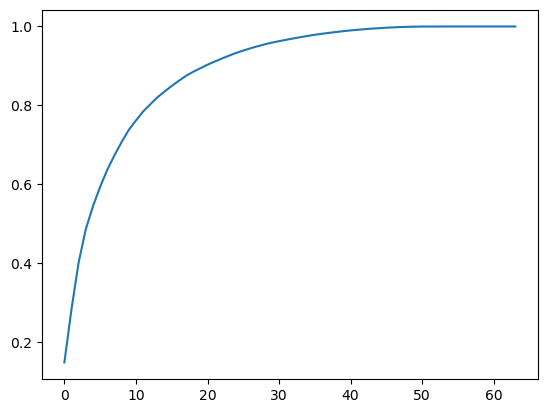

In [ ]:
# idem en graphique
plt.plot(np.cumsum(model.explained_variance_ratio_))

Sélectionner le nombre de composantes nécessaires pour dépasser 95 % de variance expliquée :
- `np.cumsum(...) >= 0.95` → tableau booléen
- `np.argmax(...)` → premier index où la condition est vraie
- `+1` car les indices commencent à 0

In [ ]:
np.argmax(np.cumsum(model.explained_variance_ratio_) > .95)+1

29

Onn peut alors entrainer le modele avec le nombre de dimensions nécéssaire pour garder 95 % de l'information du dataset

In [ ]:

model = PCA(n_components = 29)
X_reduced = model.fit_transform(X)

Pour visualiser à quoi ressemble les images à la suite de la réduction de dimension (compression)
Il faut leur redonner le nombre de dimension original pour retrouver 8x8 pixels (décompression)
